## PCA Analysis and Visualization 
Principal component analysis (PCA) is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss. It does so by creating new uncorrelated variables that successively maximize variance.

### What does a PCA analysis tell you?

Principal component analysis, or PCA, is a statistical procedure that allows you to summarize the information content in large data tables by means of a smaller set of “summary indices” that can be more easily visualized and analyzed

### When/Why to use PCA?

PCA technique is particularly useful in processing data where multi-colinearity exists between the features/variables. PCA can be used when the dimensions of the input features are high (e.g. a lot of variables). PCA can be also used for denoising and data compression.30

In [1]:
# df = pd.read_csv('/kaggle/input/digit-recognizer/train.csv')
df = pd.read_csv('train.csv')
df.head()

<IPython.core.display.Javascript object>

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         0         0  
1         0         0         0         0  
2         0         0         0         0  
3         0         0         0         0  
4         0         0         0         0  

[5 rows x 785 columns]

In [2]:
df.shape

(42000, 785)

In [3]:
df.sample(5)

label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
14761      7       0       0       0       0       0       0       0       0   
15380      1       0       0       0       0       0       0       0       0   
14162      1       0       0       0       0       0       0       0       0   
33574      7       0       0       0       0       0       0       0       0   
28677      5       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  \
14761       0  ...         0         0         0         0         0   
15380       0  ...         0         0         0         0         0   
14162       0  ...         0         0         0         0         0   
33574       0  ...         0         0         0         0         0   
28677       0  ...         0         0         0         0         0   

       pixel779  pixel780  pixel781  pixel782  pixel783  
14761         0         0         0         0         0  
15380         0         0         0         0         0  
14162         0         0         0         0         0  
33574         0         0         0         0         0  
28677         0         0         0         0         0  

[5 rows x 785 columns]

In [4]:
import matplotlib.pyplot as plt

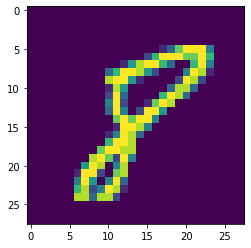

In [5]:
plt.imshow(df.iloc[18306,1:].values.reshape(28,28))

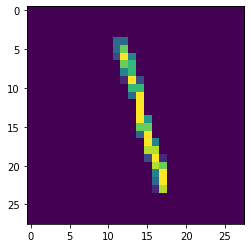

In [6]:
plt.imshow(df.iloc[17283,1:].values.reshape(28,28))

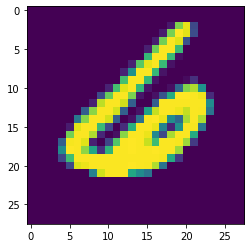

In [7]:
plt.imshow(df.iloc[6098,1:].values.reshape(28,28))

## Data display
Let's see some randomly selected images from the dataset.

In [8]:
X1 = np.array(df.iloc[:, 1:])
y1 = np.array(df.iloc[:, 0])
# test = test.to_numpy()

n = X1.shape[0]
m = X1.shape[1]

print("Number of training samples: ", n)
print ("Number of features: ", m)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Number of training samples:  42000
Number of features:  784


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

                                                                   Random examples                                                                    


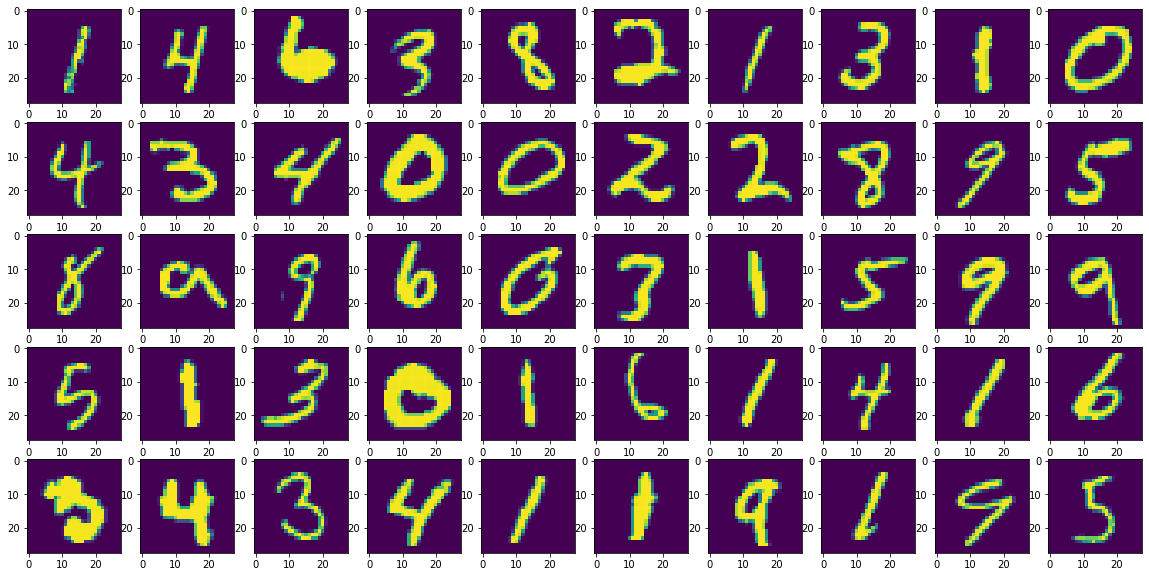

In [9]:
index = np.random.randint(0, n, 50)
plt.figure(figsize = (20, 10))
for i, idx in enumerate(index):
    plt.subplot(5, 10, i+1)
    plt.imshow(np.resize(X1[idx], (28, 28, 1)))
print("Random examples".center(150))   
plt.show()

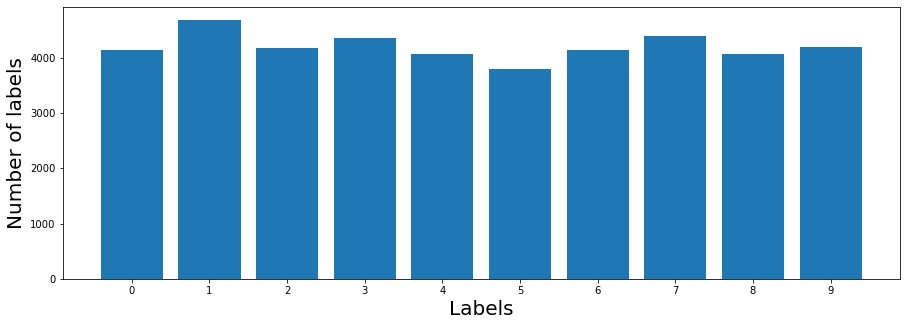

In [10]:
x_labels = sorted(list(set(y1)))
y_labels = [y1.tolist().count(i) for i in x_labels]

plt.figure(figsize = (15,5))
plt.ylabel('Number of labels',  fontsize=20)
plt.xlabel('Labels',  fontsize=20)
plt.xticks([i for i in range(len(x_labels))]) 
plt.bar(x_labels, y_labels)
plt.show()

In [11]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [12]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [13]:
X_train.shape

(33600, 784)

In [14]:
X_test.shape

(8400, 784)

In [15]:
from sklearn.neighbors import KNeighborsClassifier

In [16]:
knn = KNeighborsClassifier()

In [17]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [18]:
import time
start = time.time()

y_pred = knn.predict(X_test)

print(time.time() - start)

10.023581504821777


In [19]:
from sklearn.metrics import accuracy_score,confusion_matrix
accuracy_score(y_test,y_pred)

0.9651190476190477

In [20]:
pd.DataFrame(confusion_matrix(y_test,y_pred))

<IPython.core.display.Javascript object>

0    1    2    3    4    5    6    7    8    9
0  813    2    2    0    0    1    2    1    0    0
1    0  955    1    1    0    0    0    3    1    1
2    2    9  793    2    0    1    3   16    1    2
3    1    2    2  836    0    7    1    7    6    2
4    1   11    0    0  820    0    2    0    0   22
5    5    0    0   12    1  696    7    0    2    6
6    5    1    0    0    0    4  829    0    0    0
7    0   12    4    0    3    0    0  845    0    9
8    3    7    4   12    1   17    2    2  732   13
9    5    2    1    4   14    4    0   15    1  788

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [22]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [23]:
# PCA

from sklearn.decomposition import PCA
pca = PCA(n_components = None)

In [24]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

In [25]:
X_train.shape

(33600, 784)

In [26]:
pca = PCA(n_components = 100)

In [27]:
X_train_t = pca.fit_transform(X_train)
X_test_t = pca.transform(X_test)

In [28]:
X_train_t.shape

(33600, 100)

In [29]:
knn = KNeighborsClassifier()

In [30]:
knn.fit(X_train_t,y_train)

KNeighborsClassifier()

In [31]:
import time
start = time.time()

y_pred = knn.predict(X_test_t)

print(time.time() - start)

6.739377021789551


In [32]:
accuracy_score(y_test,y_pred)

0.9516666666666667

# Let's do it again

In [33]:
pca = PCA(n_components = 200)

In [34]:
X_train_t2 = pca.fit_transform(X_train)
X_test_t2 = pca.transform(X_test)

In [35]:
X_train_t2.shape

(33600, 200)

In [36]:
knn = KNeighborsClassifier()

In [37]:
knn.fit(X_train_t2,y_train)

KNeighborsClassifier()

In [38]:
y_pred = knn.predict(X_test_t2)

In [39]:
accuracy_score(y_test,y_pred)

0.9466666666666667

# Lets make it in a loop and check the accuracy

In [40]:
for i in range(1,20):
    pca = PCA(n_components = i)
    X_train_trf = pca.fit_transform(X_train)
    X_test_trt = pca.transform(X_test)
    
    knn = KNeighborsClassifier()
    
    knn.fit(X_train_trf,y_train)
    
    y_pred = knn.predict(X_test_trt)
    
    print(accuracy_score(y_test,y_pred))

0.25547619047619047
0.32357142857142857
0.511547619047619
0.6729761904761905
0.7378571428571429
0.8223809523809524
0.8380952380952381
0.8682142857142857
0.8807142857142857
0.9041666666666667
0.911547619047619
0.9180952380952381
0.9220238095238096
0.929404761904762
0.9333333333333333
0.9332142857142857
0.9360714285714286
0.9355952380952381
0.9364285714285714


# Transforming into 2D coordinate system

In [41]:
# Transforming into 2D coordinate system
pca = PCA(n_components = 2)
X_train_trf2 = pca.fit_transform(X_train)
X_test_trt2 = pca.transform(X_test)

In [42]:
X_train_trf2

array([[-0.8476741 ,  1.74655286],
       [-2.20901275, -5.39556842],
       [-4.19080432,  0.60878106],
       ...,
       [ 4.46289195, -0.63951145],
       [-4.50163199, -1.19801779],
       [ 0.11946985,  0.96129552]])

In [43]:
import plotly.express as px
y_train_trf2 = y_train.astype(str)
fig = px.scatter(x=X_train_trf2[:,0],
                 y=X_train_trf2[:,1],
                 color=y_train_trf2,
                 color_discrete_sequence=px.colors.qualitative.G10
                )
# fig.show()

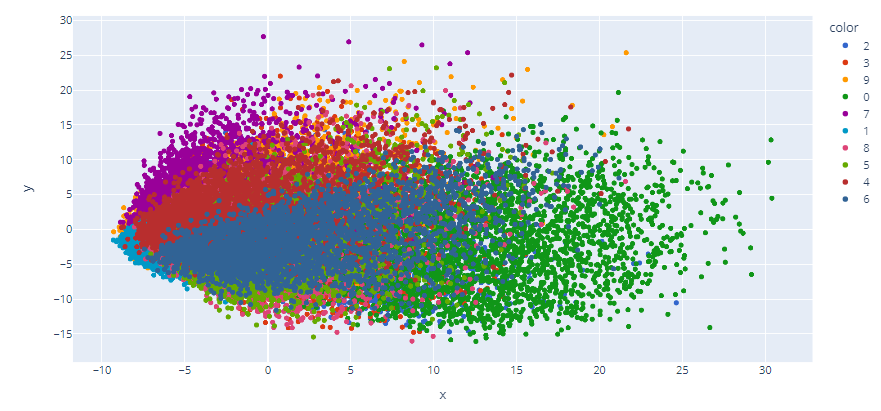

In [44]:
# Transforming into 3D coordinate system
pca = PCA(n_components = 3)
X_train_trf3 = pca.fit_transform(X_train)
X_test_trt3 = pca.transform(X_test)

In [45]:
X_train_trf3

array([[-0.84757418,  1.7468609 ,  5.42164365],
       [-2.20906311, -5.39663927,  1.86874484],
       [-4.19080537,  0.60897021,  6.87776447],
       ...,
       [ 4.46292126, -0.63845755,  4.81275406],
       [-4.50160552, -1.19696847, -2.7571463 ],
       [ 0.11943791,  0.96110714, -1.35274998]])

In [46]:
y_train_trf3 = y_train.astype(str)
fig = px.scatter_3d(df, x=X_train_trf3[:,0],
                 y=X_train_trf3[:,1],
                 z=X_train_trf3[:,2],
                 color=y_train_trf3)
fig.update_layout(
                margin=dict(l=20, r=20, t=20, b=20)
)
fig.show()

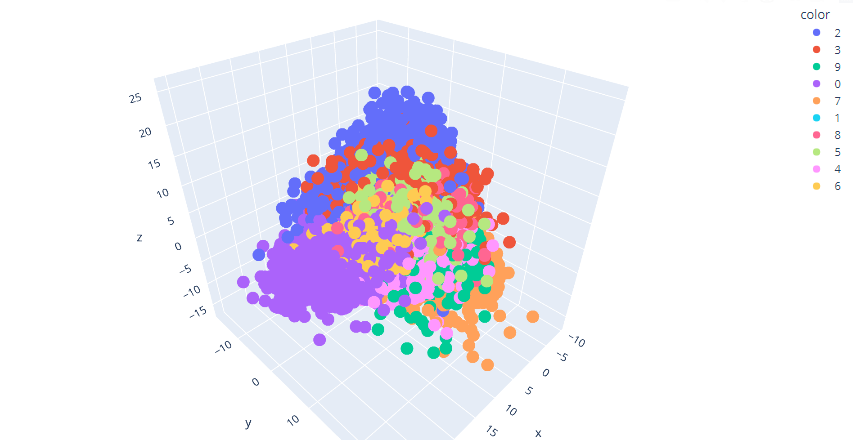

# PCA Attributes

In [47]:
pca.explained_variance_

array([40.71663636, 29.14088311, 26.8172134 ])

In [48]:
pca.components_

array([[ 1.00000000e+00, -2.68457906e-11, -1.38333908e-09, ...,
         5.51364023e-34,  6.67868102e-33, -2.64912275e-34],
       [ 2.39712073e-11,  1.00000000e+00, -7.74734873e-10, ...,
        -5.80211210e-33,  8.65161156e-33, -2.95949667e-33],
       [ 1.20360725e-09,  7.05318752e-10,  9.99999993e-01, ...,
         3.32885407e-33, -8.59194685e-33, -3.04817473e-34]])

In [49]:
pca.components_.shape

(3, 784)

## Let's Find Optimum number of Principle Components

In [50]:
pca.explained_variance_ratio_

array([0.05799918, 0.04150999, 0.03820002])

In [51]:
# Transforming into 3D coordinate system
pca = PCA(n_components = None)
X_train_tr = pca.fit_transform(X_train)
X_test_tr = pca.transform(X_test)

In [52]:
pca.explained_variance_.shape

(784,)

In [53]:
pca.components_.shape

(784, 784)

In [54]:
pca.explained_variance_ratio_

array([5.79991803e-02, 4.15099941e-02, 3.82000230e-02, 2.96607288e-02,
       2.58124018e-02, 2.24697201e-02, 1.97176857e-02, 1.78677024e-02,
       1.57052746e-02, 1.43527946e-02, 1.36776242e-02, 1.23431552e-02,
       1.14780382e-02, 1.11932307e-02, 1.06489673e-02, 1.01742336e-02,
       9.55305742e-03, 9.40066285e-03, 9.18227261e-03, 8.98451006e-03,
       8.50721173e-03, 8.21952352e-03, 7.84314245e-03, 7.60246479e-03,
       7.35335020e-03, 7.09471097e-03, 7.00489567e-03, 6.75214422e-03,
       6.39723226e-03, 6.27330969e-03, 6.19365552e-03, 6.05132766e-03,
       5.89674873e-03, 5.80589192e-03, 5.72152218e-03, 5.55692620e-03,
       5.46343151e-03, 5.30463762e-03, 5.12583098e-03, 5.00835566e-03,
       4.91852432e-03, 4.85103983e-03, 4.72258152e-03, 4.64455231e-03,
       4.56995562e-03, 4.49967657e-03, 4.47777704e-03, 4.43499037e-03,
       4.41666895e-03, 4.29957350e-03, 4.23241448e-03, 4.17577938e-03,
       4.11065029e-03, 4.02499443e-03, 3.99317179e-03, 3.98320091e-03,
      

In [55]:
np.cumsum(pca.explained_variance_ratio_)

<IPython.core.display.Javascript object>

array([0.05799918, 0.09950917, 0.1377092 , 0.16736993, 0.19318233,
       0.21565205, 0.23536973, 0.25323744, 0.26894271, 0.28329551,
       0.29697313, 0.30931628, 0.32079432, 0.33198755, 0.34263652,
       0.35281075, 0.36236381, 0.37176447, 0.38094675, 0.38993126,
       0.39843847, 0.40665799, 0.41450114, 0.4221036 , 0.42945695,
       0.43655166, 0.44355656, 0.4503087 , 0.45670593, 0.46297924,
       0.4691729 , 0.47522423, 0.48112097, 0.48692687, 0.49264839,
       0.49820532, 0.50366875, 0.50897338, 0.51409922, 0.51910757,
       0.5240261 , 0.52887714, 0.53359972, 0.53824427, 0.54281422,
       0.5473139 , 0.55179168, 0.55622667, 0.56064334, 0.56494291,
       0.56917533, 0.5733511 , 0.57746176, 0.58148675, 0.58547992,
       0.58946312, 0.59336758, 0.59714261, 0.60087936, 0.60457987,
       0.60820612, 0.61177812, 0.61530108, 0.61878842, 0.62222742,
       0.62561036, 0.62897869, 0.63231763, 0.63555434, 0.63876658,
       0.64193464, 0.64506916, 0.64816639, 0.65124861, 0.65431

<IPython.core.display.Javascript object>

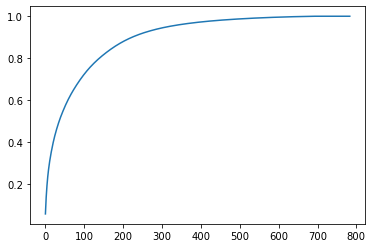

In [56]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))

# When PCA does not work?